In [1]:
####   campo "altura normalizada" com problema

In [2]:
#contar os itens de uma lista
#from collections import Counter

#visualizar graficos
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import numpy as np
#bibliotecas pandas de leitura de arquivos
import pandas as pd
#caracter 
import re


#from IPython.display import Image
from pathlib import Path

#from scipy import stats

In [3]:
# Definição se disco C: (laptop) ou D: (desktop) 
config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())


DIR_DATASET = DIR_PREFIXO / "PA_clean" / "desfecho" / "dataset"
DIR_PADRAO_DOENCA = DIR_PREFIXO / "PA_clean" / "desfecho" / "padrao_doenca"

In [4]:
#leitura do dataset completo com dados cadastrais, medidas e estatísticas
dataset = pd.read_csv(DIR_PADRAO_DOENCA / "pacientes_padrao_doenca" / 'desfecho_classificados_por_padroes_de_doenca_estatistica.csv',
                      sep=';', encoding="Latin1")

#dataset = dataset.drop ("Unnamed: 0", axis=1)
#for i in dataset.columns:
#    print(repr(i))
#

In [5]:
dataset

,numero_identificacao,nome,data_nascimento,genero,idade,peso,altura,data_exame,sist 9:00,sist 9:15,...,mech_complication_mi___4,outcome_thrombus,outcome_nosocom_infect_v,outcome_hyperglycemia_v,gastrointest_bleed_v,outcome_hb_drop_v,outcome_neutropenia_v,outcome_transaminase_v,comments_f16_v,desfechos_complete
0,3766,CLAUDIO SASAOKA,1968-03-12,M,51,95.0,"1,84",2019-03-27 14:41:24,119.0,119.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,9201,PEDRO AUGUSTO LEMOS DE CASTRO,1980-05-01,M,39,76.0,162,2019-08-06 09:08:09,128.0,129.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,12770,DANYELLE COELHO DE ARAUJO SOUSA,2000-05-01,F,19,85.0,158,2019-11-06 13:34:16,98.0,116.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2
3,6295,MARGARIDA MARIA DE BRITO RABELO,1954-03-01,F,65,63.0,163,2019-05-28 10:27:03,134.0,124.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,883,ANA ELIZABETH DA SILVEIRA C.SIQUEIRA,1958-09-24,F,60,68.0,"1,53",2019-01-28 11:04:12,129.0,127.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,19559,MARLENE DIAS FEIJÓ,1964-02-15,F,56,75.0,"1,58",2020-07-08 08:52:47,113.0,116.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2
1369,5623,SIDNEI CORREA MARQUES,1953-06-25,M,65,76.0,174,2019-05-14 08:29:00,117.0,113.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2
1370,16685,VANDI DA COSTA,1943-03-23,F,76,70.0,173,2020-02-28 08:06:00,127.0,126.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1371,11603,UBIRACY TEIXEIRA BRAZAO,1938-08-11,M,81,70.0,168,2019-10-07 14:25:14,169.0,164.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2


In [6]:
dataset.loc[:,'Hipotensao':]

,Hipotensao,Sistolica Isolada,Diastolica Isolada,Dipping,Non Dipping,Extreme Dipping,Reverse Dipping,Morning Surge,Masked,Whitecoat,...,mech_complication_mi___4,outcome_thrombus,outcome_nosocom_infect_v,outcome_hyperglycemia_v,gastrointest_bleed_v,outcome_hb_drop_v,outcome_neutropenia_v,outcome_transaminase_v,comments_f16_v,desfechos_complete
0,1,0,0,1,0,0,0,1,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,0,0,1,0,0,0,0,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1,0,0,0,1,0,0,0,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2
3,1,0,0,1,0,0,0,1,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0,0,0,0,1,0,0,0,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,1,0,0,0,1,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2
1369,1,0,0,0,1,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2
1370,1,0,0,0,0,0,1,0,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1371,1,0,0,0,0,0,1,0,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2


In [7]:
#converter peso em float

def Tratar_Peso(peso):    
    
    try:
        if peso[-1] == ',' or peso[-1] == '.':
            peso =  peso[:-1]
    except:
        pass
    
    
    try:
        peso = float(peso)
    except:
        peso = float(peso.replace(',','.'))
    return peso

#converter altura
def Tratar_Altura(altura):       
       
    
    if re.match('\d,,\d', altura):
        altura = altura.replace(',,','')
    
    try:
        if altura[-1] == ',' or altura[-1] == '.' or  altura[-1] == ']':
            altura =  altura[:-1]
    except:
        pass
    
    try:
        altura = float(altura)
    except:
        altura = float(altura.replace(',','.'))     
    
    # convt 150.00 para 1.50
    if altura >= 3:
        altura = altura/100 
    
    
    return altura

#calcular o IMC
def IMC(peso,altura):  
        
    imc = float(peso) / (float(altura) ** 2)
    
    return round (imc, 1)


#Trocar  True para 1 e False para 0
def verdadeiro_falso(valor):
    if valor == True:
        return 1
    else:
        return 0

def normaliza_float(n):
    if isinstance(n, (float, int)):
        return n
    if isinstance(n, str):
        if "," in n:
            n = n.replace(",", ".")
        if not n.replace(".", "").isdigit():
            n = "".join(digito for digito in n if digito in "0123456789.")
        n = n.replace("..", ".")
        if not n or n.count(".") > 1:
            n = float("nan")
         # convt 150.00 para 1.50
        n = float(n)
        if n >= 3:
            while 1:
                if (n//10 == 0.0 or n//10 == 0):
                    break
                else:
                    n = n/10 
    return float(n)


In [8]:
# Identificando dados espúrios no campo altura e descartando
dataset = dataset[dataset['altura'] != '?']

#filtrar nulos em peso e altura
dataset = dataset[~dataset['peso'].isnull() & ~dataset['altura'].isnull()]


In [9]:
len(dataset)

1366

In [10]:
#  Normalizando Peso e Altura
dataset['peso_normalizado'] = dataset['peso'].apply(Tratar_Peso)
dataset['altura_normalizada'] = dataset['altura'].apply(normaliza_float)

In [11]:
#max(dataset_apos_tratamento['peso_normalizado'])
#max(dataset_apos_tratamento['altura_normalizada'].values)


In [12]:
#calculo do IMC
# Inclui coluna de IMC no dataset de entrada
dataset['IMC'] = dataset.apply(lambda row : IMC(row['peso_normalizado'], row['altura_normalizada']), axis = 1)

In [13]:
dataset = dataset[(dataset['idade'] != 0) & (dataset['peso_normalizado'] <= 200)]
dataset

,numero_identificacao,nome,data_nascimento,genero,idade,peso,altura,data_exame,sist 9:00,sist 9:15,...,outcome_hyperglycemia_v,gastrointest_bleed_v,outcome_hb_drop_v,outcome_neutropenia_v,outcome_transaminase_v,comments_f16_v,desfechos_complete,peso_normalizado,altura_normalizada,IMC
0,3766,CLAUDIO SASAOKA,1968-03-12,M,51,95.0,"1,84",2019-03-27 14:41:24,119.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,95.0,1.84,28.1
1,9201,PEDRO AUGUSTO LEMOS DE CASTRO,1980-05-01,M,39,76.0,162,2019-08-06 09:08:09,128.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,76.0,1.62,29.0
2,12770,DANYELLE COELHO DE ARAUJO SOUSA,2000-05-01,F,19,85.0,158,2019-11-06 13:34:16,98.0,116.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2,85.0,1.58,34.0
3,6295,MARGARIDA MARIA DE BRITO RABELO,1954-03-01,F,65,63.0,163,2019-05-28 10:27:03,134.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,63.0,1.63,23.7
4,883,ANA ELIZABETH DA SILVEIRA C.SIQUEIRA,1958-09-24,F,60,68.0,"1,53",2019-01-28 11:04:12,129.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,68.0,1.53,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,19559,MARLENE DIAS FEIJÓ,1964-02-15,F,56,75.0,"1,58",2020-07-08 08:52:47,113.0,116.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2,75.0,1.58,30.0
1369,5623,SIDNEI CORREA MARQUES,1953-06-25,M,65,76.0,174,2019-05-14 08:29:00,117.0,113.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2,76.0,1.74,25.1
1370,16685,VANDI DA COSTA,1943-03-23,F,76,70.0,173,2020-02-28 08:06:00,127.0,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,70.0,1.73,23.4
1371,11603,UBIRACY TEIXEIRA BRAZAO,1938-08-11,M,81,70.0,168,2019-10-07 14:25:14,169.0,164.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2,70.0,1.68,24.8


In [14]:
pesos = dataset[(dataset['idade'] != 0) & (dataset['peso_normalizado'] <= 200)]['peso_normalizado'].unique()
pesos.sort()
pesos

array([ 40.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,
        52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,
        63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,
        74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
        85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106.,
       107., 108., 109., 110., 111., 113., 114., 115., 116., 117., 118.,
       120., 125., 127., 130., 135., 137., 140., 148., 149., 174.])

In [15]:
# transform Gender M and F to binary 
#  gênero = F => 0
# gênero = M => 1
#

limpa_coluna_genero = {"genero": {"M": True, "F": False}}
controle = 1
genero0 = dataset['genero']
for i in range(len(genero0)):
    if genero0.iloc[i] != 'M' and genero0.iloc[i] != 'F':
        if controle == 1:
            genero0.iloc[i] = 0
            controle = 0
        else:
            genero0.iloc[i] = 1
            controle = 1

dataset['genero'] = genero0

dataset = dataset.replace(limpa_coluna_genero)

dataset["genero"] = dataset["genero"].astype(int)

limpa_coluna_genero = {"genero": {"M": True, "F": False}}
#
#


In [16]:
dataset['idade'] = dataset['idade'].fillna(-1)
dataset = dataset[dataset['idade'] != -1]

In [17]:
#  Política de descarte: pacientes menores que 18 anos ou pacientes com 12 IMC < 95
#
dataset = dataset[(dataset['IMC'] <= 95)
            & (dataset['IMC'] >= 15)
            & (dataset['idade'] >= 18)
            & (dataset['altura_normalizada'] <= 2.5)]

In [18]:
print (dataset)

      numero_identificacao                                     nome  \
0                     3766                          CLAUDIO SASAOKA   
1                     9201            PEDRO AUGUSTO LEMOS DE CASTRO   
2                    12770          DANYELLE COELHO DE ARAUJO SOUSA   
3                     6295          MARGARIDA MARIA DE BRITO RABELO   
4                      883     ANA ELIZABETH DA SILVEIRA C.SIQUEIRA   
...                    ...                                      ...   
1368                 19559                       MARLENE DIAS FEIJÓ   
1369                  5623                    SIDNEI CORREA MARQUES   
1370                 16685                           VANDI DA COSTA   
1371                 11603                  UBIRACY TEIXEIRA BRAZAO   
1372                 17966  MARIA APARECIDA PINTO DIAS DE CARVALHO    

     data_nascimento  genero  idade  peso altura           data_exame  \
0         1968-03-12       1     51  95.0   1,84  2019-03-27 14:41:24   
1

In [19]:
dataset.head(15)

,numero_identificacao,nome,data_nascimento,genero,idade,peso,altura,data_exame,sist 9:00,sist 9:15,...,outcome_hyperglycemia_v,gastrointest_bleed_v,outcome_hb_drop_v,outcome_neutropenia_v,outcome_transaminase_v,comments_f16_v,desfechos_complete,peso_normalizado,altura_normalizada,IMC
0,3766,CLAUDIO SASAOKA,1968-03-12,1,51,95.0,"1,84",2019-03-27 14:41:24,119.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,95.0,1.84,28.1
1,9201,PEDRO AUGUSTO LEMOS DE CASTRO,1980-05-01,1,39,76.0,162,2019-08-06 09:08:09,128.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,76.0,1.62,29.0
2,12770,DANYELLE COELHO DE ARAUJO SOUSA,2000-05-01,0,19,85.0,158,2019-11-06 13:34:16,98.0,116.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2,85.0,1.58,34.0
3,6295,MARGARIDA MARIA DE BRITO RABELO,1954-03-01,0,65,63.0,163,2019-05-28 10:27:03,134.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,63.0,1.63,23.7
4,883,ANA ELIZABETH DA SILVEIRA C.SIQUEIRA,1958-09-24,0,60,68.0,"1,53",2019-01-28 11:04:12,129.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,68.0,1.53,29.0
5,19009,RAMIRO HOFMEISTER DE ALMEIDA M.COSTA,1963-01-16,1,57,95.0,180,2020-06-22 09:09:47,119.0,121.0,...,0.0,1.0,0.0,0.0,0.0,NaN,2,95.0,1.80,29.3
6,883,ANA ELIZABETH DA SILVEIRA C.SIQUEIRA,1958-09-24,0,60,68.0,"1,53",2019-01-28 11:04:12,129.0,127.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2,68.0,1.53,29.0
7,4206,VANDERLEI GOMES DE CASTRO,1968-03-08,1,51,90.0,168,2019-04-08 10:25:18,158.0,160.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2,90.0,1.68,31.9
8,17201,DANIELA SOUSA MENDES,1986-01-16,0,34,83.0,163,2020-03-12 07:48:42,114.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,83.0,1.63,31.2
9,11482,GUILHERME ALVES RODRIGUES,1990-01-17,1,29,99.0,187,2019-10-03 14:16:15,118.0,107.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2,99.0,1.87,28.3


In [20]:
for doenca in list(dataset.loc[:,'Hipotensao':'Normotenso'].columns):
    dataset[doenca] = dataset[doenca].apply(verdadeiro_falso)
dataset

,numero_identificacao,nome,data_nascimento,genero,idade,peso,altura,data_exame,sist 9:00,sist 9:15,...,outcome_hyperglycemia_v,gastrointest_bleed_v,outcome_hb_drop_v,outcome_neutropenia_v,outcome_transaminase_v,comments_f16_v,desfechos_complete,peso_normalizado,altura_normalizada,IMC
0,3766,CLAUDIO SASAOKA,1968-03-12,1,51,95.0,"1,84",2019-03-27 14:41:24,119.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,95.0,1.84,28.1
1,9201,PEDRO AUGUSTO LEMOS DE CASTRO,1980-05-01,1,39,76.0,162,2019-08-06 09:08:09,128.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,76.0,1.62,29.0
2,12770,DANYELLE COELHO DE ARAUJO SOUSA,2000-05-01,0,19,85.0,158,2019-11-06 13:34:16,98.0,116.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2,85.0,1.58,34.0
3,6295,MARGARIDA MARIA DE BRITO RABELO,1954-03-01,0,65,63.0,163,2019-05-28 10:27:03,134.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,63.0,1.63,23.7
4,883,ANA ELIZABETH DA SILVEIRA C.SIQUEIRA,1958-09-24,0,60,68.0,"1,53",2019-01-28 11:04:12,129.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,68.0,1.53,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,19559,MARLENE DIAS FEIJÓ,1964-02-15,0,56,75.0,"1,58",2020-07-08 08:52:47,113.0,116.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2,75.0,1.58,30.0
1369,5623,SIDNEI CORREA MARQUES,1953-06-25,1,65,76.0,174,2019-05-14 08:29:00,117.0,113.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2,76.0,1.74,25.1
1370,16685,VANDI DA COSTA,1943-03-23,0,76,70.0,173,2020-02-28 08:06:00,127.0,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,70.0,1.73,23.4
1371,11603,UBIRACY TEIXEIRA BRAZAO,1938-08-11,1,81,70.0,168,2019-10-07 14:25:14,169.0,164.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2,70.0,1.68,24.8


In [21]:
dataset.info

<bound method DataFrame.info of       numero_identificacao                                     nome  \
0                     3766                          CLAUDIO SASAOKA   
1                     9201            PEDRO AUGUSTO LEMOS DE CASTRO   
2                    12770          DANYELLE COELHO DE ARAUJO SOUSA   
3                     6295          MARGARIDA MARIA DE BRITO RABELO   
4                      883     ANA ELIZABETH DA SILVEIRA C.SIQUEIRA   
...                    ...                                      ...   
1368                 19559                       MARLENE DIAS FEIJÓ   
1369                  5623                    SIDNEI CORREA MARQUES   
1370                 16685                           VANDI DA COSTA   
1371                 11603                  UBIRACY TEIXEIRA BRAZAO   
1372                 17966  MARIA APARECIDA PINTO DIAS DE CARVALHO    

     data_nascimento  genero  idade  peso altura           data_exame  \
0         1968-03-12       1     51  95.0 

In [22]:
sub_dataset = dataset.loc[:,['IMC','peso_normalizado', 'altura_normalizada']].copy()
dataset = dataset[dataset['altura_normalizada'] <= 2.5]
dataset = dataset.drop(['peso_normalizado', 'altura_normalizada', 'IMC'],axis=1)
dataset = pd.concat([dataset.loc[:,'numero_identificacao':'altura'],
                     sub_dataset,
                     dataset.loc[:,'data_exame':]],
                        axis=1)

print(len(dataset))
# Dataset com IMC e tratamento de Nans com a política de normalização
dataset.to_csv(DIR_DATASET / "dados_desfecho_tratados" / "desfecho_pacientes_completos_tratados.csv", 
                        sep=";", encoding="latin1", index=False)
print(DIR_DATASET)
dataset.to_csv(DIR_DATASET /  "dados_desfecho_tratados" / "desfecho_pacientes_com_tab.csv", 
                        sep="\t", encoding="latin1", index=False)

1354
D:\PA_clean\desfecho\dataset


In [23]:
#  Gerar arquivo completo com atributos categorizados
#  quantificar por categorias e total de pacientes
#  quantificar média de PAS e PAD em 24h 
dataset.head()

,numero_identificacao,nome,data_nascimento,genero,idade,peso,altura,IMC,peso_normalizado,altura_normalizada,...,mech_complication_mi___4,outcome_thrombus,outcome_nosocom_infect_v,outcome_hyperglycemia_v,gastrointest_bleed_v,outcome_hb_drop_v,outcome_neutropenia_v,outcome_transaminase_v,comments_f16_v,desfechos_complete
0,3766,CLAUDIO SASAOKA,1968-03-12,1,51,95.0,"1,84",28.1,95.0,1.84,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,9201,PEDRO AUGUSTO LEMOS DE CASTRO,1980-05-01,1,39,76.0,162,29.0,76.0,1.62,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,12770,DANYELLE COELHO DE ARAUJO SOUSA,2000-05-01,0,19,85.0,158,34.0,85.0,1.58,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2
3,6295,MARGARIDA MARIA DE BRITO RABELO,1954-03-01,0,65,63.0,163,23.7,63.0,1.63,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,883,ANA ELIZABETH DA SILVEIRA C.SIQUEIRA,1958-09-24,0,60,68.0,"1,53",29.0,68.0,1.53,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Gera arquivo para t-SNE

In [24]:
# dataset apenas com as medidas para input do t-SNE
dataset_tab_sem_cabecalho = dataset.loc[:,'sist 9:00':'diast 8:45']
dataset_tab_sem_cabecalho.to_csv(DIR_DATASET / "com_desfechos" / "t-SNE" / "desfecho_pacientes_para_tSNE.tsv", 
                        sep="\t", encoding="latin1", header=False, index=False)

## Gráficos 

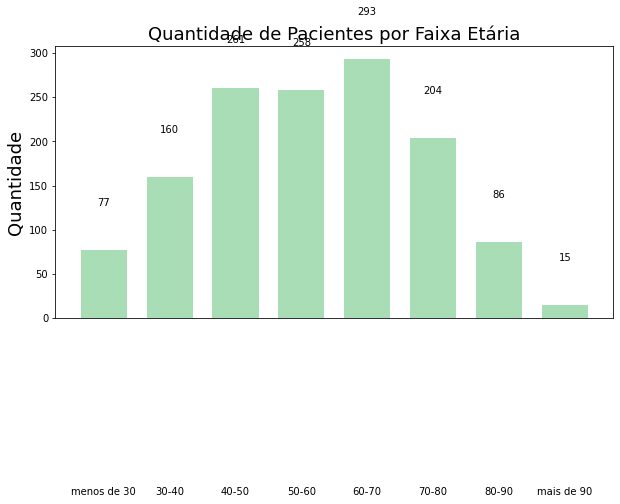

In [25]:
#   Gráfico da quantidade de pacientes por faixa etária a cada 10 anos após políticas de descarte e imputação
#
# "#a8ddb5"

plt.rcParams['figure.figsize'] = [10, 5]


def converte_idade(idade):
    if idade < 30:
        return 25
    if idade > 90:
        return 95
    return idade

idades_categorizadas = dataset["idade"].apply(converte_idade)

y_counts, x_counts, patches = plt.hist(idades_categorizadas, [20,30,40,50,60,70,80,90,100], rwidth=0.7, color="#a8ddb5")

for i, barra in enumerate(patches):
   x = (barra._x0 + barra._x1) / 2
   y = barra._y1 + 50
   plt.text(x, y, int(barra._y1), horizontalalignment="center")
   texto = f"{x_counts[i]}-{x_counts[i+1]}" if i > 0 and i < len(x_counts) - 2 else (
   "menos de 30" if i == 0  else "mais de 90"
   )
   plt.text(x, barra._y0 - 200, texto, horizontalalignment="center")
plt.xticks([]) 
# plt.xticks(range(0,120,10))
plt.title("Quantidade de Pacientes por Faixa Etária", fontsize=18)
plt.ylabel('Quantidade', fontsize=18)
#plt.xlabel('Faixa Etária em Anos')
plt.savefig(DIR_DATASET / "dados_desfecho_tratados" / "graficos_dados_desfecho_tratados" / "qtd_pacientes_faixa_etaria.png")
plt.show()

In [26]:
print (dataset.columns)

Index(['numero_identificacao', 'nome', 'data_nascimento', 'genero', 'idade',
       'peso', 'altura', 'IMC', 'peso_normalizado', 'altura_normalizada',
       ...
       'mech_complication_mi___4', 'outcome_thrombus',
       'outcome_nosocom_infect_v', 'outcome_hyperglycemia_v',
       'gastrointest_bleed_v', 'outcome_hb_drop_v', 'outcome_neutropenia_v',
       'outcome_transaminase_v', 'comments_f16_v', 'desfechos_complete'],
      dtype='object', length=415)


In [27]:
############################### FUNÇÕES ##########################################

#Funções para inicializar o valor de K para entregar ao método k-means.fit

# sum_of_squares_medidas = calculate_wcss(dados_medidas_sem_id)
# num_otimo_clusters_medidas = optimal_number_of_clusters(sum_of_squares_medidas)

def calculate_wcss(data):
    """
    Inicialização do valor de k:
    A partir de X que recebe o dataset recortado de cada abordagem. 
    Varia o valor inicial de k de 2 a 20 vezes e, em cada uma dessas iterações calcula 
    a soma dos quadrados das distâncias das amostras em relação ao centroide (intra-clusters).
    Guarda esses 20 valores de distância na lista wcss que será entregue à função 'optimal_number_of_clusters'
    
    Parametros
    ----------
    data : DataFrame
        conjunto de dados para fazer o `.fit()` do KMeans

    Returns
    -------
    wcss : lista contendo os valores calculados das distâncias da soma de quadrados intra-cluster
    """
    
    from sklearn.cluster import KMeans
    wcss = []
    for n in range(2, 21):
        #     iniciando com o mínimo de 2 clusters
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    """
    Objetivo: Identificar qual o valor de k que tenha a maior distância 
    entre os pontos calculadas pela somas dos quadrados iterando com a lista wcss 
    calculada com a função `calculate_wcss()`
    
    Parametros
    ----------
    wcss : lista contendo os valores de soma de quadrados intra-cluster

    
    Returns
    -------
    int : número de clusters 
    """
    from math import sqrt
    # começa com x1 = 2 porque foi designado assim. y1 é o 1o. elemento da lista wcss
    # x2 = 20 porque foi designado assim, y2 é o último elemento da lista wcss
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 2

In [28]:
#  Ao final, é calculado os centroides gerando uma matriz cujas colunas são os grupos e as linhas são as features
#
#biblioteca do kmeans
from sklearn.cluster import KMeans
import time
inicio = time.time()
inicio

def aplica_kmeans(dados_sem_id, abordagem):
    inicio = time.time()
    dados_array = np.array(dados_sem_id)
    sum_of_squares = calculate_wcss(dados_array)
    num_otimo_clusters = optimal_number_of_clusters(sum_of_squares)
    print('\n\nNumero otimo de cluster - Abordagem {1}: {0}\n\n'.format(num_otimo_clusters, abordagem))
    
    #habilitando o kmeans com 8 grupos (foi calculado na etapa anterior)
    kmeans = KMeans(n_clusters=num_otimo_clusters, random_state=42).fit(dados_array)
    
    #listar os grupos 
    grupos = kmeans.fit_predict(dados_array) + 1
    
    #Centroides
    centros = kmeans.cluster_centers_
    dici = {}
    for cluster,centro in enumerate(centros):
        dici[f"c{cluster+1}"] = centro
    
    df_centroides = pd.DataFrame(dici)
    
    df_centroides.to_excel(DIR_PREFIXO / "PA_clean" / "desfecho" / "centroide" /  f'desfecho_centroide_kmeans_{abordagem.lower().replace(" ","_")}.xlsx', 
                            index=False)
                           #encoding="latin1", index=False)
    
    fim = time.time()
    print(f'Tempo de execucao: {round(fim - inicio,3)} s\n\n')
    return grupos

In [29]:
dados_medidas_sem_id = dataset.loc[:,'sist 9:00':'diast 8:45']

dados_medidas_array = np.array(dados_medidas_sem_id)

grupos_medidas = aplica_kmeans(dados_medidas_sem_id, 'Medidas')
print(grupos_medidas)



Numero otimo de cluster - Abordagem Medidas: 7


Tempo de execucao: 5.494 s


[5 5 5 ... 1 6 2]


In [30]:

dataset = dataset.reset_index().drop(['index'],axis=1)
dataset_com_grupos = pd.concat([dataset.loc[:,:'data_exame'],
                    pd.DataFrame({'grupo':grupos_medidas}),       
                    dataset.loc[:,'sist 9:00':]],
                    axis=1)
# ,encoding='UTF-8'   encoding="latin1"
print(len(dataset))
#print(dataset)
dataset_com_grupos.to_csv(DIR_DATASET / "com_desfechos" / "desfecho_pacientes_tratados.csv", 
                        sep=";", encoding='Latin1', index=False)
# 

1354


In [31]:
dataset_com_grupos.grupo

0       5
1       5
2       5
3       2
4       1
       ..
1349    5
1350    4
1351    1
1352    6
1353    2
Name: grupo, Length: 1354, dtype: int32